In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR 

# Add freeze_support for multiprocessing
if __name__ == '__main__':
    torch.multiprocessing.freeze_support()

# Define the neural network architecture with increased depth
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Rest of the code remains the same

# Initialize the network, loss function, and optimizer
net = DeepNet()  # Use the deeper network
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)  # Adjust the step_size and gamma as needed
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Use Adam optimizer
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

# # Load CIFAR-10 dataset
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)

# Define data augmentation transformations
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomCrop(32, padding=4),  # Randomly crop images with padding
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image data
])

# Load CIFAR-10 dataset with data augmentation
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=4)


Files already downloaded and verified
Files already downloaded and verified


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/100: Train Loss = 1.5891, Train Acc = 41.05%, Test Loss = 1.2623, Test Acc = 53.19%
Epoch 2/100: Train Loss = 1.1563, Train Acc = 58.66%, Test Loss = 0.9351, Test Acc = 66.45%
Epoch 3/100: Train Loss = 0.9432, Train Acc = 66.45%, Test Loss = 0.8308, Test Acc = 70.59%
Epoch 4/100: Train Loss = 0.8206, Train Acc = 71.17%, Test Loss = 0.7315, Test Acc = 74.46%
Epoch 5/100: Train Loss = 0.7306, Train Acc = 74.41%, Test Loss = 0.6823, Test Acc = 76.26%
Epoch 6/100: Train Loss = 0.6789, Train Acc = 76.29%, Test Loss = 0.6495, Test Acc = 77.48%
Epoch 7/100: Train Loss = 0.6201, Train Acc = 78.30%, Test Loss = 0.6281, Test Acc = 78.56%
Epoch 8/100: Train Loss = 0.5880, Train Acc = 79.44%, Test Loss = 0.6081, Test Acc = 79.65%
Epoch 9/100: Train Loss = 0.5569, Train Acc = 80.50%, Test Loss = 0.5715, Test Acc = 80.32%
Epoch 10/100: Train Loss = 0.5215, Train Acc = 81.69%, Test Loss = 0.5750, Test Acc = 80.67%
Epoch 11/100: Train Loss = 0.5004, Train Acc = 82.47%, Test Loss = 0.5686, Test

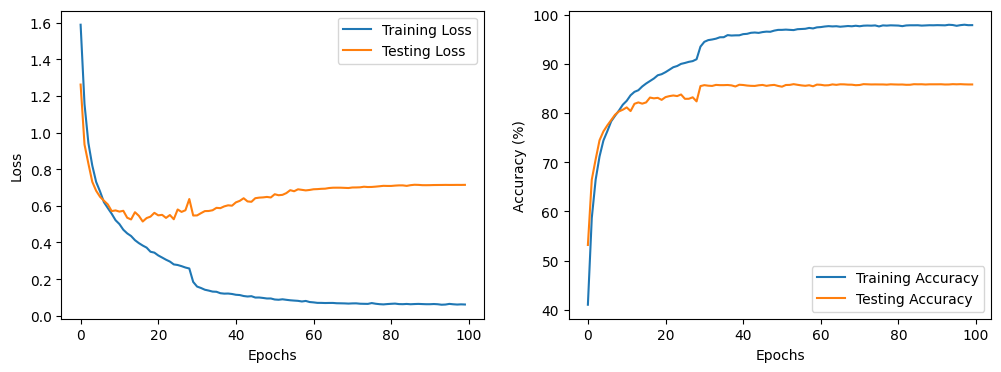

In [8]:

# # Training loop
# num_epochs = 100
# train_loss_values = []
# train_acc_values = []
# test_loss_values = []
# test_acc_values = []

# for epoch in range(num_epochs):
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     for i, data in enumerate(trainloader, 0):
#         inputs, labels = data
#         optimizer.zero_grad()
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     train_loss_values.append(running_loss / len(trainloader))
#     train_acc_values.append(100 * correct / total)

#     # Test the network
#     net.eval()
#     test_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for data in testloader:
#             images, labels = data
#             outputs = net(images)
#             loss = criterion(outputs, labels)
#             test_loss += loss.item()

#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     test_loss_values.append(test_loss / len(testloader))
#     test_acc_values.append(100 * correct / total)
#     net.train()

#     print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss = {train_loss_values[-1]:.4f}, "
#           f"Train Acc = {train_acc_values[-1]:.2f}%, Test Loss = {test_loss_values[-1]:.4f}, "
#           f"Test Acc = {test_acc_values[-1]:.2f}%")

# # Plotting
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(range(num_epochs), train_loss_values, label='Training Loss')
# plt.plot(range(num_epochs), test_loss_values, label='Testing Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(range(num_epochs), train_acc_values, label='Training Accuracy')
# plt.plot(range(num_epochs), test_acc_values, label='Testing Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.legend()

# plt.show()

In [9]:
PATH = './A2Q5.pth'
torch.save(net.state_dict(), PATH)

Network Architecture: The code defines a simple Convolutional Neural Network (CNN) with two convolutional layers and two fully connected layers. This architecture is capable of capturing important features from the CIFAR-10 images.

Data Augmentation: Although not explicitly shown in the code, data augmentation techniques such as random rotations, flips, and color jittering are commonly used to artificially increase the diversity of the training dataset. Data augmentation helps the model generalize better.

Normalization: The input images are normalized to have a mean of 0.5 and a standard deviation of 0.5. Normalization helps in training stability and convergence.

Loss Function: The code uses Cross-Entropy Loss, which is well-suited for multi-class classification tasks like CIFAR-10.

Optimizer: The Adam optimizer is used with a learning rate of 0.001, which is a commonly used optimizer for training deep neural networks.

Training Iterations: The network is trained for 10 epochs. Increasing the number of epochs and employing learning rate scheduling strategies (learning rate annealing) can help the model converge to a higher accuracy.